In [10]:
from google.colab import files

uploaded = files.upload()

Saving TestData.csv to TestData.csv
Saving TrainData.csv to TrainData.csv
Saving ValData.csv to ValData.csv


In [0]:
# data analysis for MUSIC data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import savetxt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 9

# extra added for using inbuilt sigmoid

from scipy.special import expit

In [0]:
op_cases = 10
train_df = pd.read_csv("TrainData.csv")
data_t = train_df.to_numpy()
x_train = data_t[:,0:29]
y_train = data_t[:,29:39]

val_df = pd.read_csv("ValData.csv")
data_v = val_df.to_numpy()
x_val = data_v[:,0:29]
y_val = data_v[:,29:39]

test_df = pd.read_csv("TestData.csv")
data_te = test_df.to_numpy()
x_test = data_te[:,0:29]
y_test = data_te[:,29:39]

In [0]:
#cost function for logistic regression
def costFunction(X,y,theta,lam):
    m=X.shape[0]
    prod=np.zeros((X.shape[0],theta.shape[1]))
    
    prod=X.dot(theta)
    #print(prod)
    h=1/(1+np.exp(-prod))
    J = (-1/m)*np.sum( y*np.log(h +1e-20) + (1-y)*np.log(1-h +1e-20)) + (lam/(2*m))*((np.sum(theta))-np.sum(theta[0,:]));
    return [J,h]

In [0]:
# gradient descent algorithm
def grad_descent_vec(X,y,theta,lam,max_itr,alpha):
    m=X.shape[0]
    J_hist=np.zeros((max_itr,1))
    for i in range(max_itr):
        [J,h]=costFunction(X,y,theta,lam)
        dif = h-y
        theta = theta - (alpha/m)*((X.T).dot(dif))
        J_hist[i]=J
    return [theta,J_hist]

In [0]:
def learning_curve(xT,xV,yT,yV,theta,lam):
    ma=yV.shape[0]
    J_t_error = np.zeros((ma-1,1))
    J_v_error = np.zeros((ma-1,1))
    for i in range(2,ma+1):
        [J_t_error[i-2],h] = costFunction(xT[0:i-1,:], yT[0:i-1,:], theta, lam)
        [J_v_error[i-2],h] = costFunction(xV[0:i-1,:], yV[0:i-1,:], theta, lam)
    i=np.arange(1,ma,1)
    #print(J_t_error,J_v_error)
    plt.plot(i,J_t_error,label='Train Error')
    plt.plot(i,J_v_error,label='Validation Error')
    plt.legend(loc='upper left')
    plt.title('learning curve')
    plt.show()

In [0]:
# the function to find degree for best results. 
def lc_degree(d_max,xT,xV,yT,yV,lam,max_itr,alpha,col):
    power=1;
    ma=yV.shape[0]
    J_t_error = np.zeros((d_max,1))
    J_v_error = np.zeros((d_max,1))
    for i in range(d_max):
        initial_theta = np.ones((xT.shape[1],yT.shape[1]))
        [theta,j_hist] = grad_descent_vec(xT, yT, initial_theta,lam, max_itr, alpha)    
        [J_t_error[i],h] = costFunction(xT[0:ma,:], yT[0:ma,:], theta, lam)
        [J_v_error[i],h] = costFunction(xV, yV, theta, lam)
        fact = normalise_fact( np.append(np.power(xT,i+1) , np.power(xV,i+1),axis=0) )
        #fact=1
        #powT = normalise_fact(np.power(xT,i+1))
        #powV = normalise_fact(np.power(xV,i+1))
        #xT = np.append(xT, powT,axis=1)
        #xV = np.append(xV, powV,axis=1)
        xT = np.power(xT,i+1) / fact
        xV = np.power(xV,i+1) / fact
        #print(j_hist)
    power = np.argmin(J_v_error)
    i=np.arange(1,d_max+1,1)
    plt.plot(i,J_t_error,label='Train Error')
    plt.plot(i,J_v_error,label='Validation Error')
    plt.legend(loc='upper left')
    plt.title(col)
    plt.show()
    return power

def normalise_fact(x):
    Max = np.max(x)
    Min = np.min(x)
    fact = (Max-Min)
    return fact

In [0]:
def prediction(h,y):
    h_out=np.zeros((h.shape[0],h.shape[1]))
    add=0
    for i in range(h.shape[0]):
        result = np.where(h[i:i+1,:] == np.amax(h[i:i+1,:],axis=1))
        list_of_cordinates= list(zip(result[0],result[1]))
        #print(list_of_cordinates)
        cord = list_of_cordinates[0][1]
        h_out[i:i+1,cord]=1
        if np.all(h_out[i:i+1,:]==y[i:i+1,:]):
            add=add+1

    accuracy = add / h.shape[0] *100
    return [h_out,accuracy]

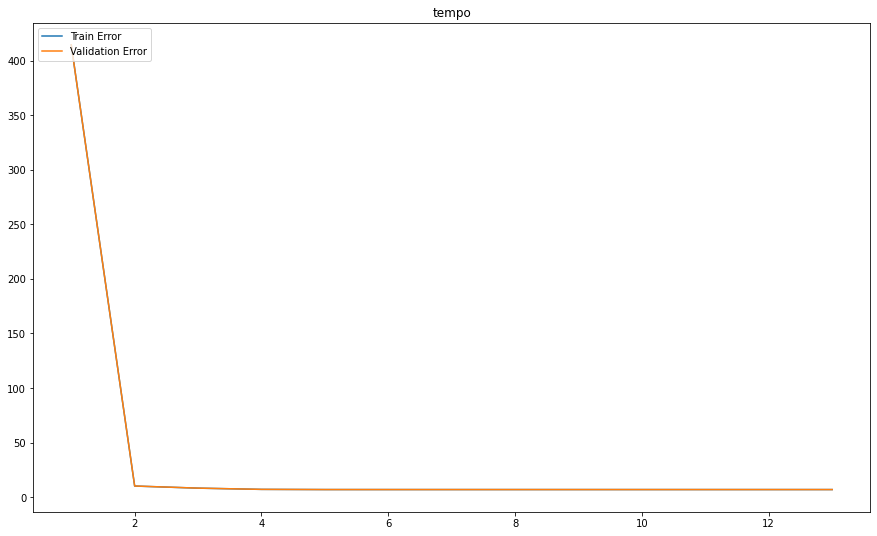

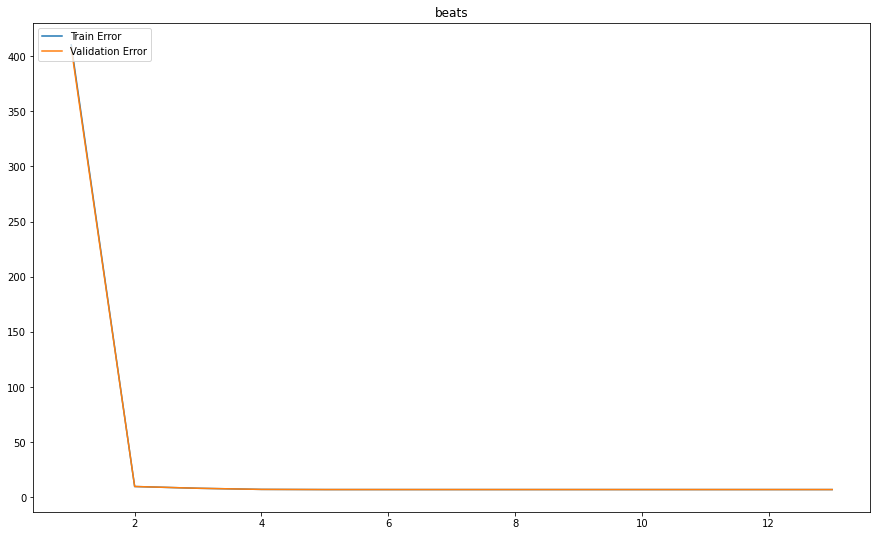

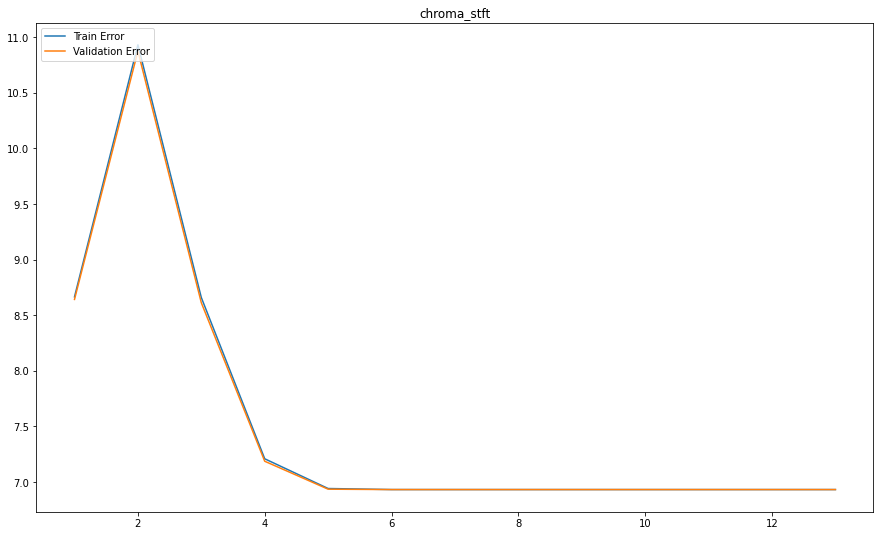

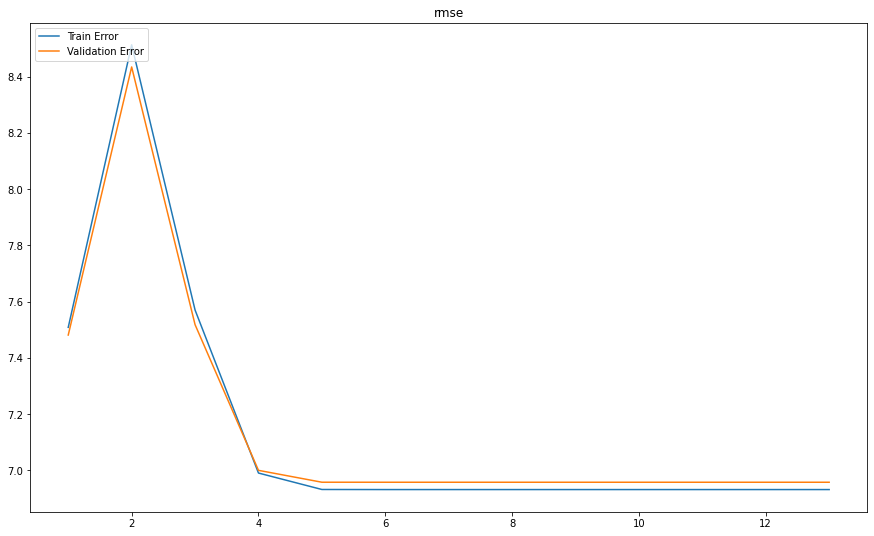

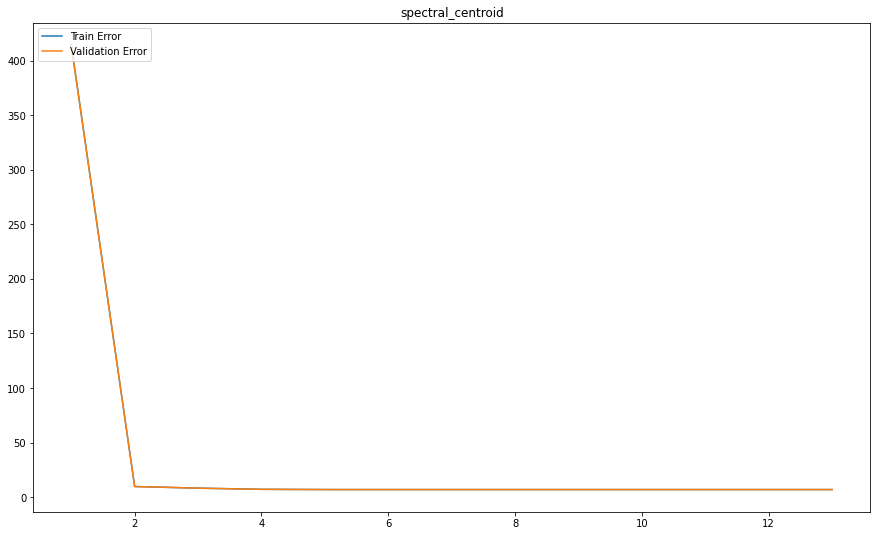

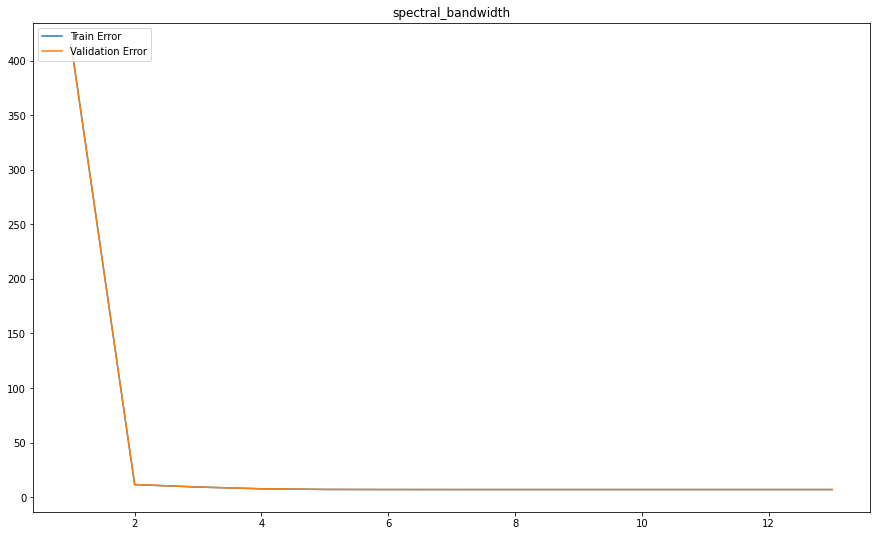

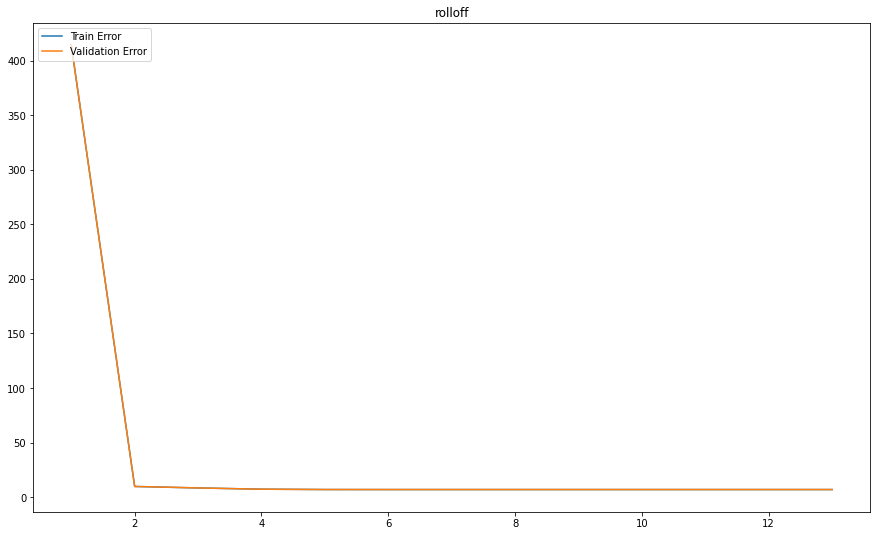

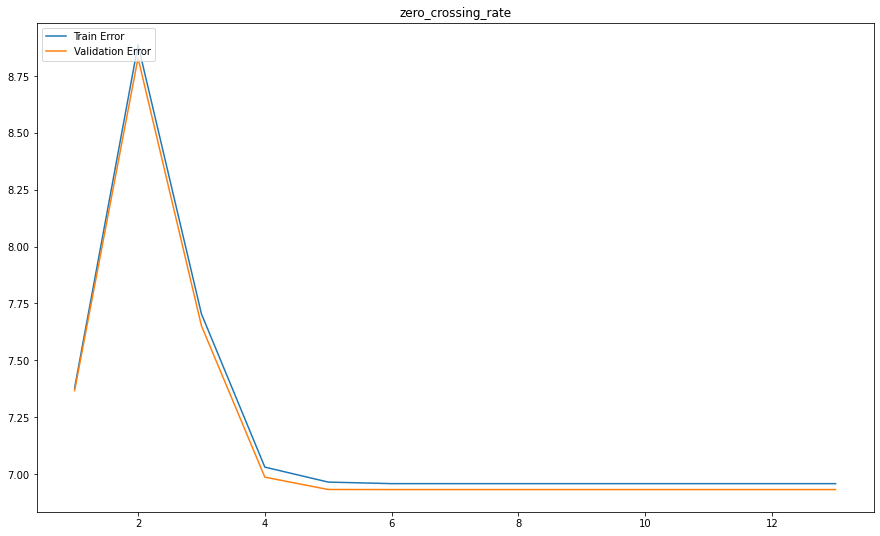

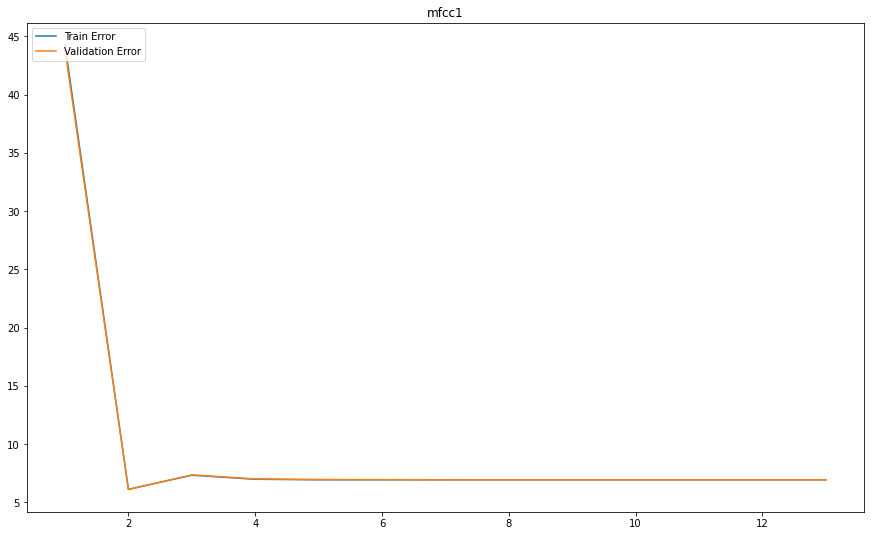

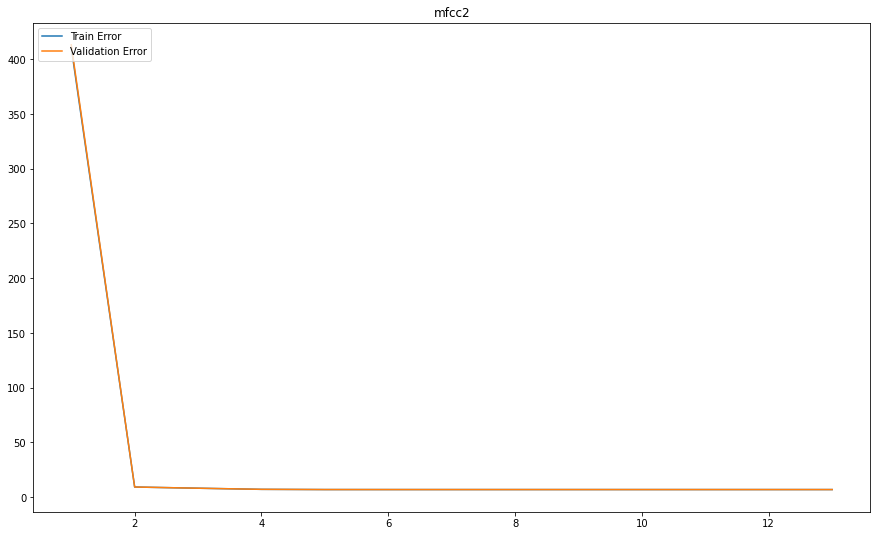

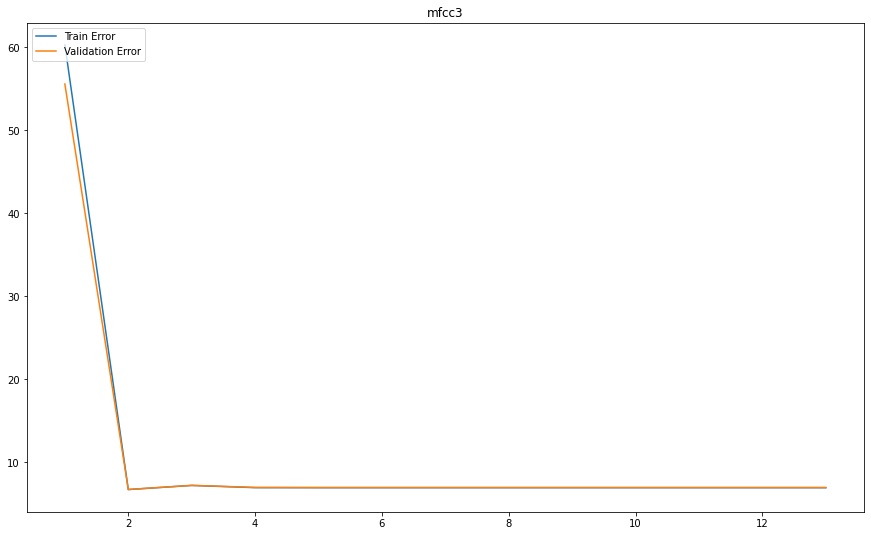

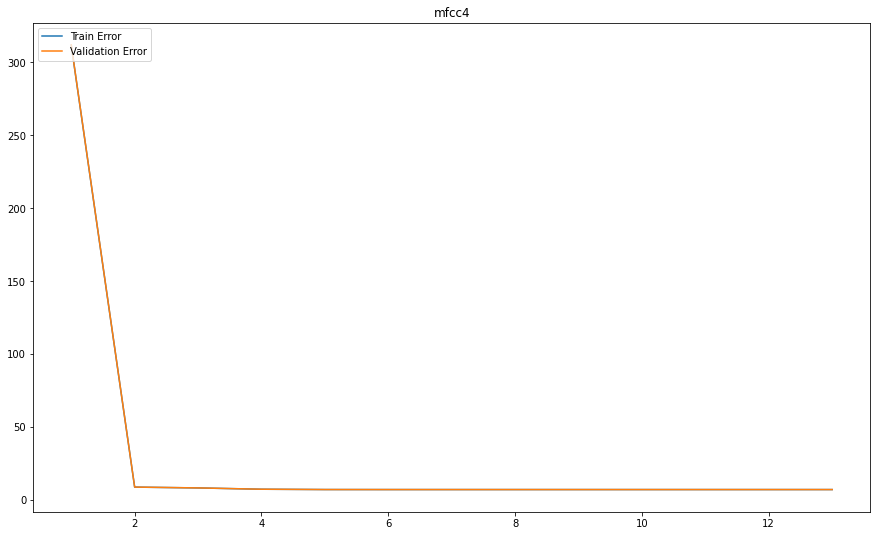

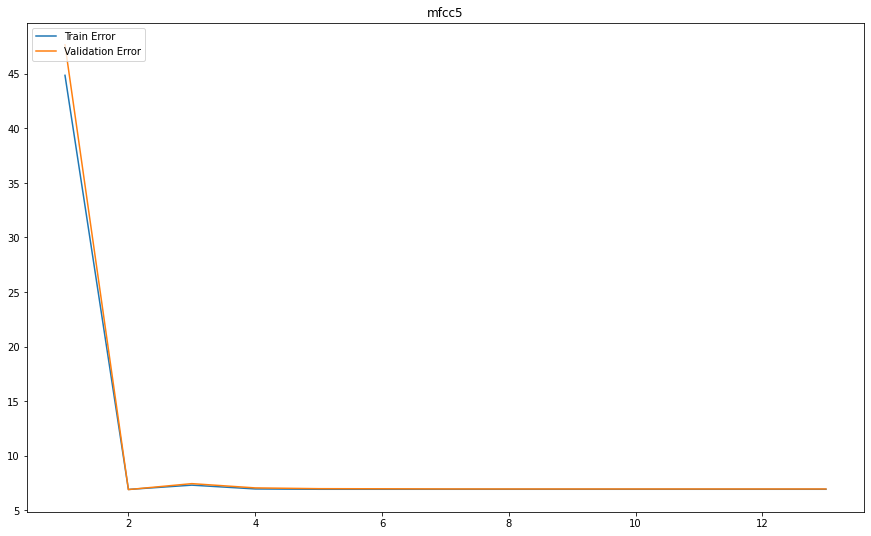

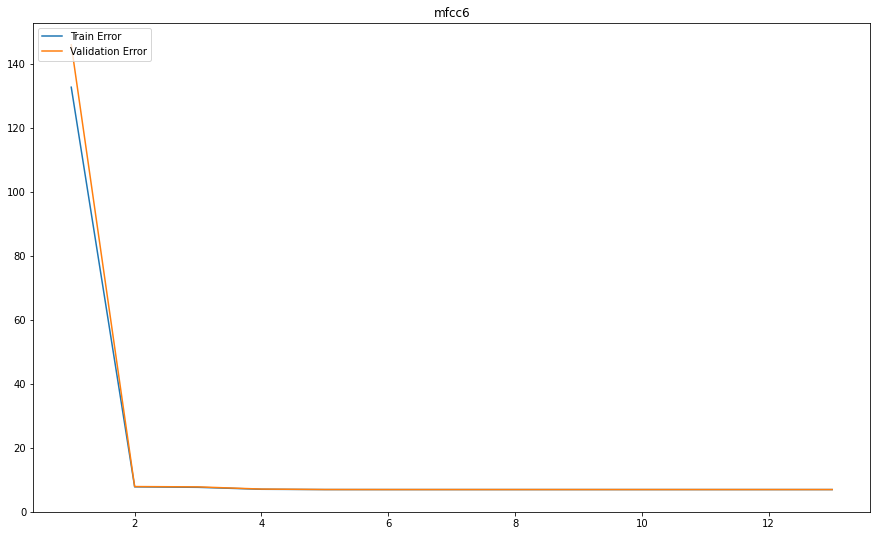

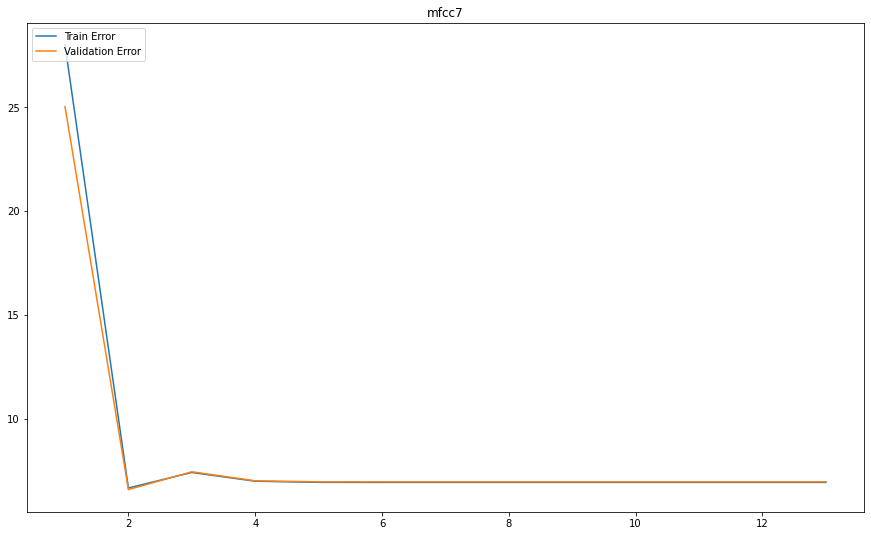

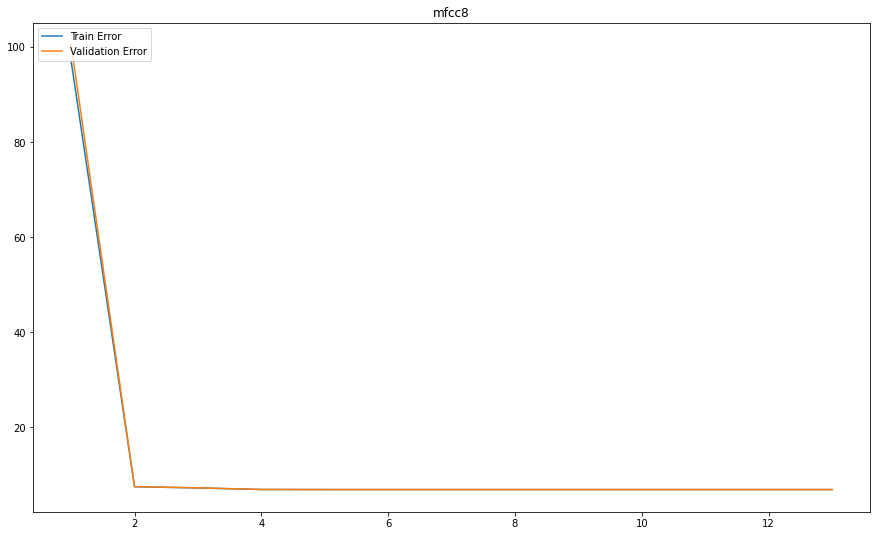

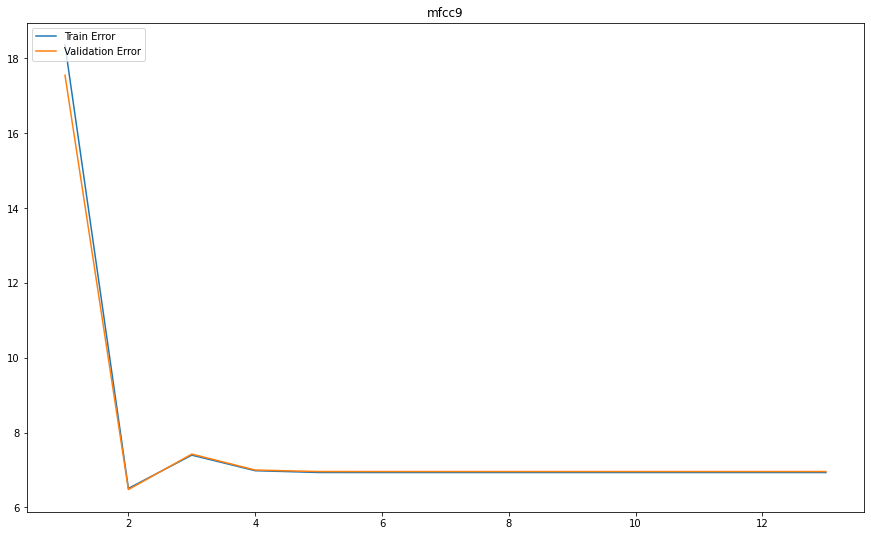

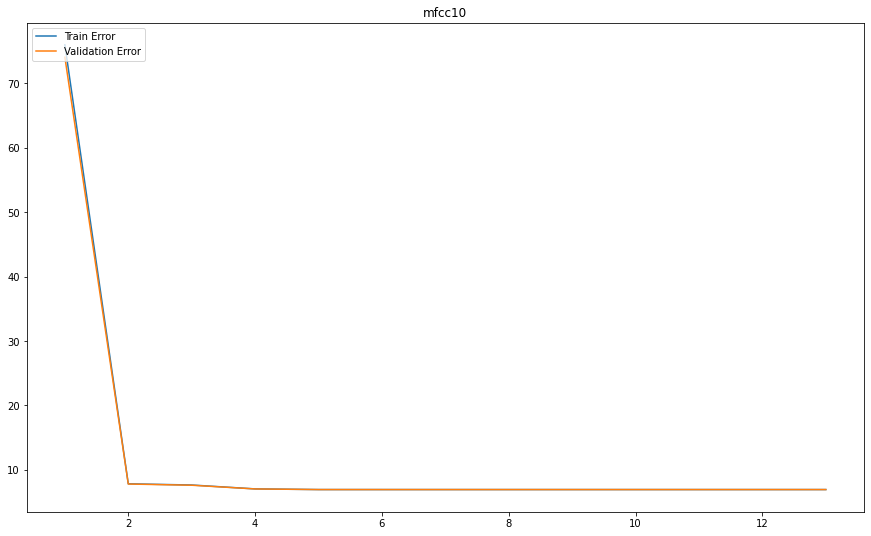

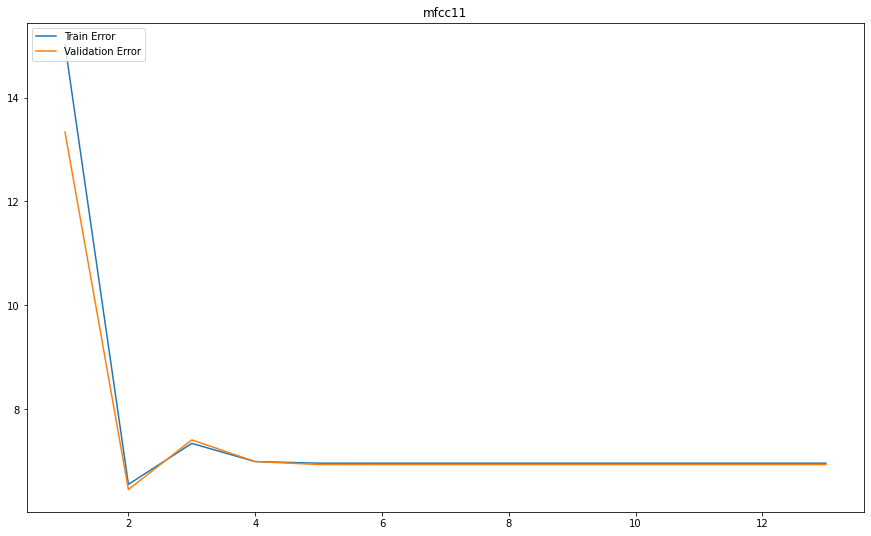

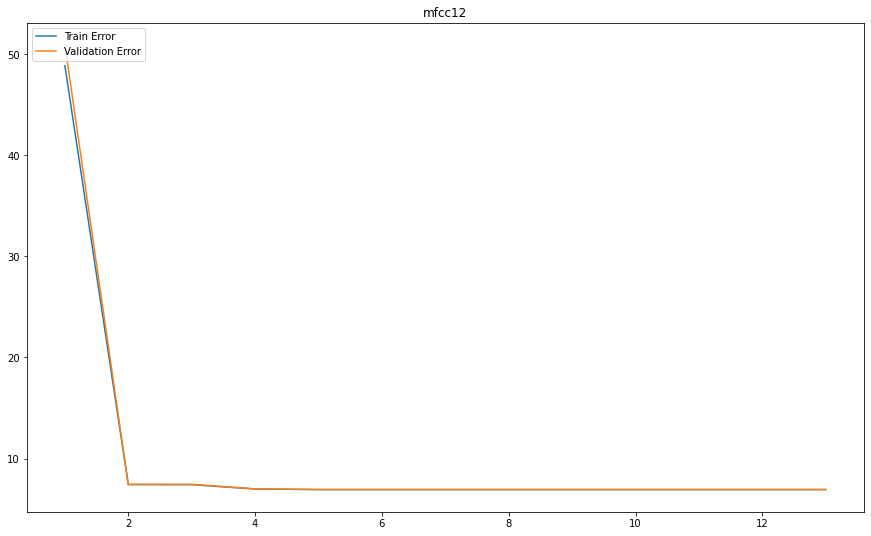

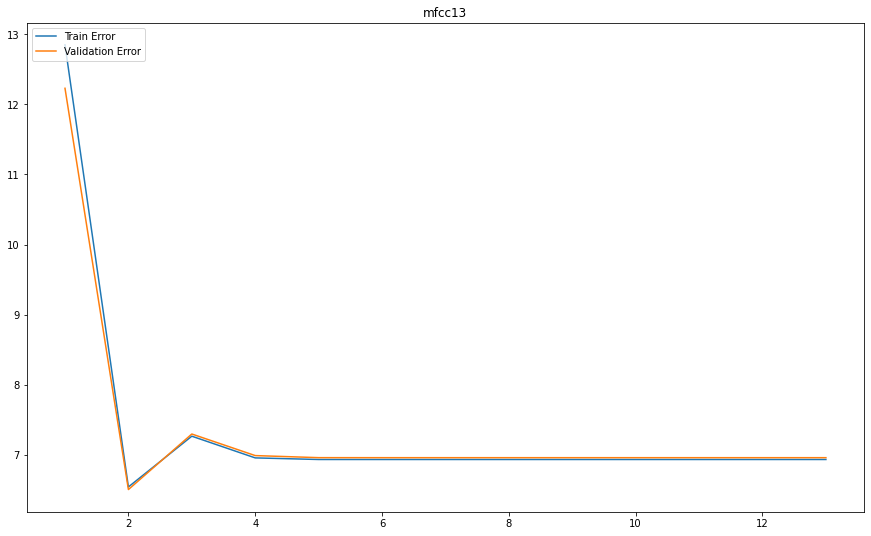

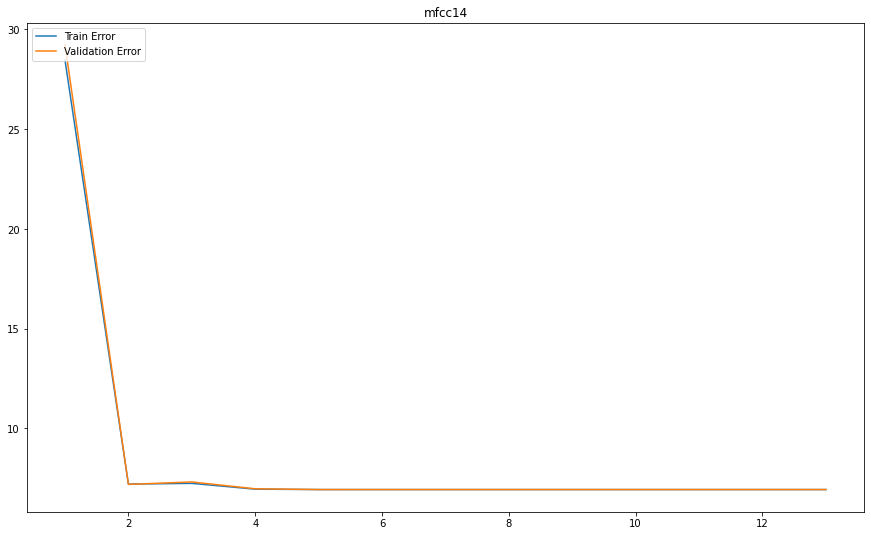

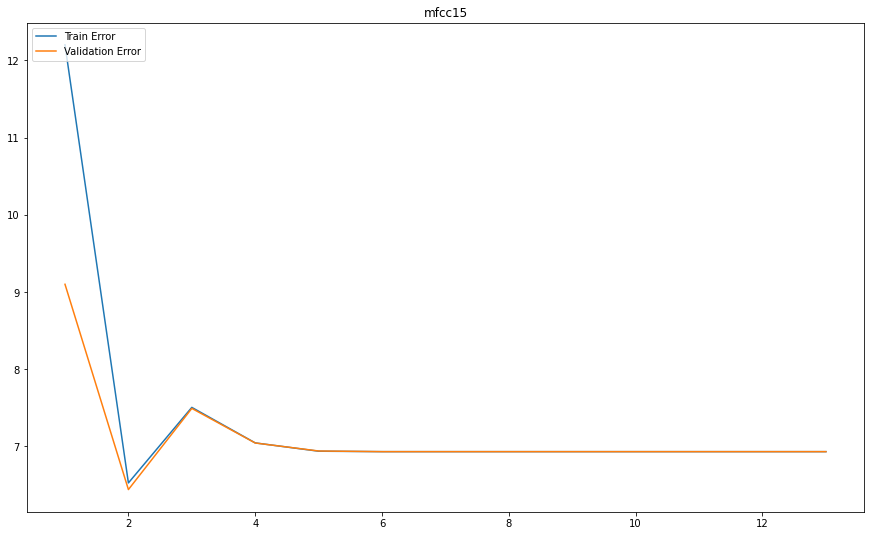

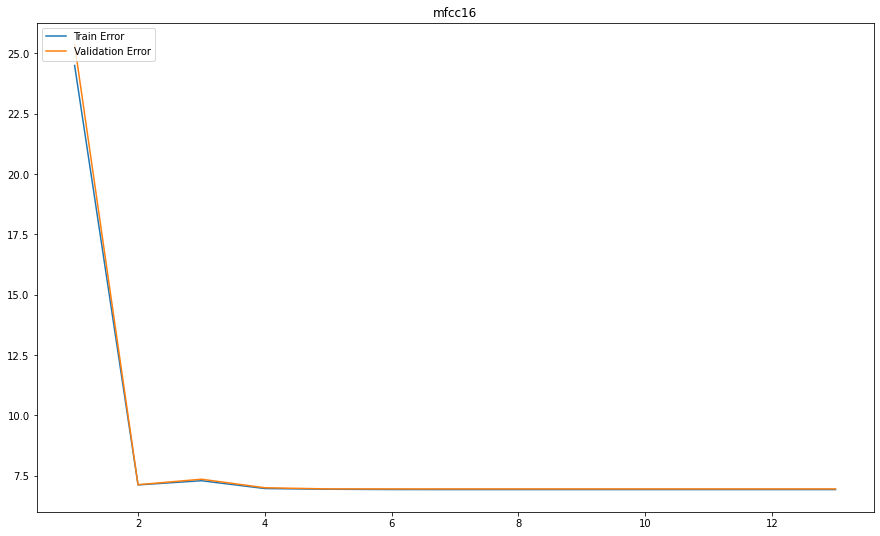

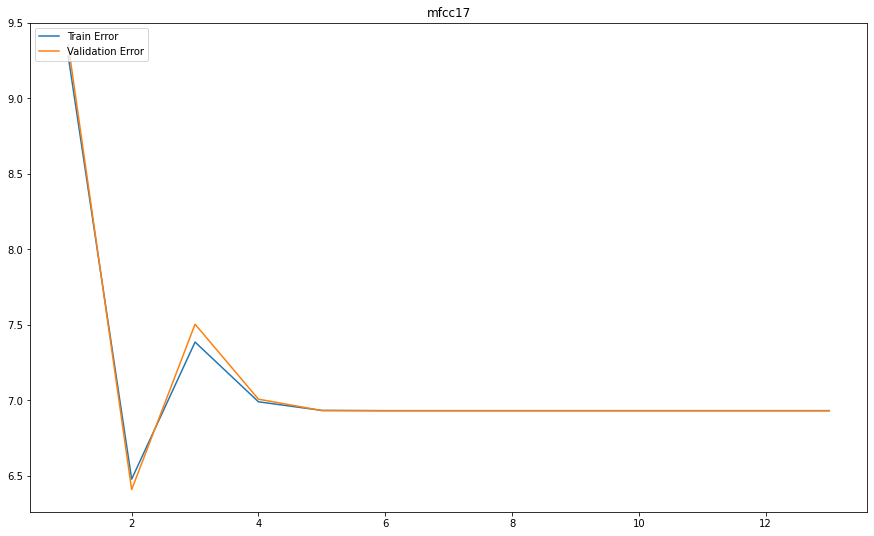

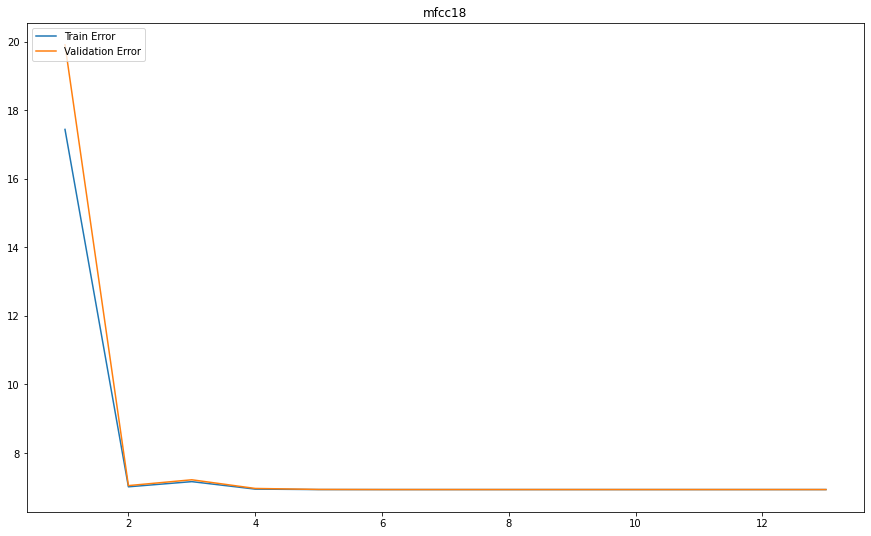

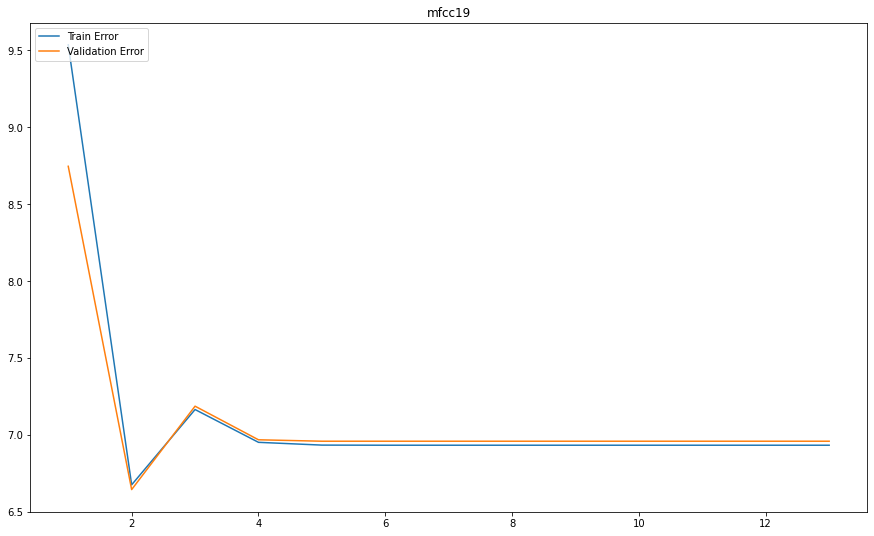

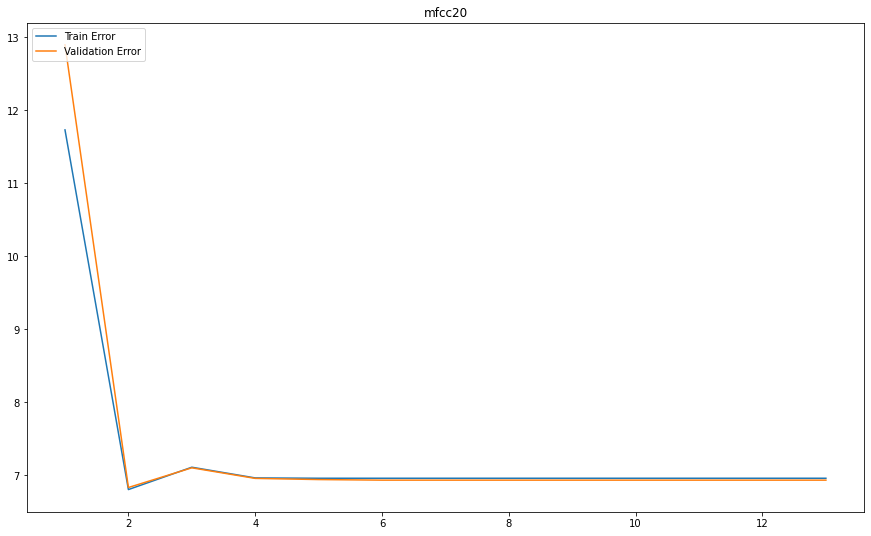

In [104]:
# to check the best degree for all features

columns = ['x0',	'tempo',	'beats',	'chroma_stft',	'rmse',	'spectral_centroid',	'spectral_bandwidth',	'rolloff',	'zero_crossing_rate',	'mfcc1',	'mfcc2',	'mfcc3',	'mfcc4',	'mfcc5',	'mfcc6',	'mfcc7',	'mfcc8',	'mfcc9',	'mfcc10',	'mfcc11',	'mfcc12',	'mfcc13',	'mfcc14',	'mfcc15',	'mfcc16',	'mfcc17',	'mfcc18',	'mfcc19',	'mfcc20']
power = [None] * len(columns)
d_max=13
#print(x_train[:,2:3])
for i in range(0,28):
    #print(x_train[:,i+1:i+2])
    power[i]=lc_degree(d_max, x_train[:,i+1:i+2], x_val[:,i+1:i+2], y_train, y_val, lam, max_itr, alpha,columns[i+1])

In [78]:
print(power)

[6, 6, 6, 5, 0, 6, 6, 6, 1, 6, 1, 6, 1, 7, 1, 5, 1, 6, 1, 6, 1, 6, 1, 5, 1, 6, 1, None, None]


In [105]:
print(power)

[6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 1, 6, 1, 7, 1, 5, 1, 6, 1, 6, 1, 6, 1, 5, 1, 6, 1, 1, None]


In [0]:
initial_theta= np.ones((x_train.shape[1],y_train.shape[1])) * .2
[J,h]=costFunction(x_train, y_train, initial_theta,0)
#[J,h]=cost(x_train, y_train, initial_theta,0)
max_itr = 200
alpha = .000001
lam=0

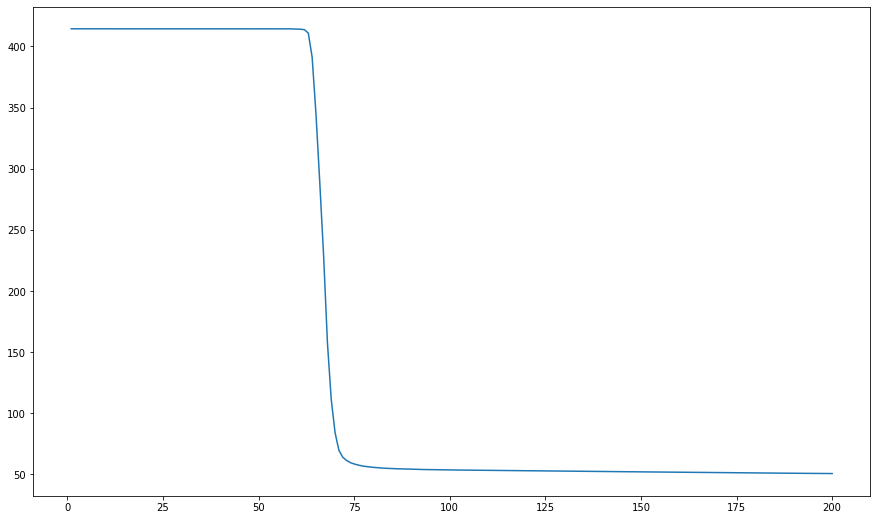

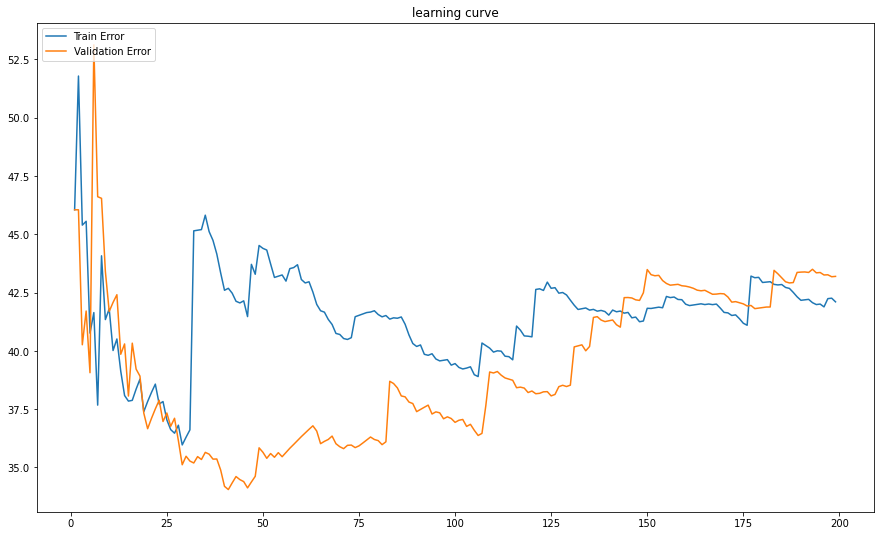

In [101]:
[theta,j_hist] = grad_descent_vec(x_train, y_train, initial_theta,0, max_itr, alpha)

i=np.arange(1,201,1)
plt.plot(i,j_hist)
plt.show()

learning_curve(x_train, x_val, y_train, y_val, theta, lam)

In [107]:
[J,h_train]=costFunction(x_train, y_train, theta,0)

h_train,acc=prediction(h_train,y_train)
print("\naccuracy (train):  ",acc)

[J,h_test]=costFunction(x_test, y_test, theta,0)

h_test,acc=prediction(h_test,y_test)
print("\naccuracy:  ",acc)


accuracy (train):   11.166666666666666

accuracy:   11.5


In [106]:
print(theta)

[[ 0.19993595  0.19994059  0.19993322  0.19992624  0.19992753  0.19993391
   0.19992799  0.19992183  0.19993067  0.19993036]
 [ 0.19216556  0.19286462  0.19165428  0.19091552  0.19095167  0.19180979
   0.19126563  0.19016454  0.19166627  0.19141   ]
 [ 0.19627414  0.19651398  0.19603665  0.19569455  0.19570695  0.19609642
   0.19585823  0.19533017  0.19605722  0.19592585]
 [ 0.19997567  0.19997558  0.19997489  0.19997373  0.19997491  0.19997429
   0.19997561  0.19997169  0.19997537  0.19997463]
 [ 0.19999198  0.1999906   0.19999149  0.19999074  0.19999161  0.19999078
   0.1999912   0.19999123  0.19999105  0.19999096]
 [ 0.06493935  0.06679141  0.06529897  0.06683287  0.06652963  0.06479568
   0.06999786  0.06553458  0.06565464  0.06641971]
 [ 0.06063814  0.06222026  0.05928416  0.05400644  0.05544889  0.05958696
   0.05203092  0.05351988  0.05842026  0.05686712]
 [-0.07589964 -0.08063358 -0.07597842 -0.07109576 -0.07189027 -0.07628755
  -0.0717879  -0.06948541 -0.07400372 -0.07306843]
